In [1]:
from jupyter_dash import JupyterDash

In [2]:
import dash_core_components as dcc 
import dash_html_components as html 
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [4]:
selector = ['all'] + [i for i in range(1,13)]
selector

['all', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [9]:
'all' in selector

True

## 貿易収支の可視化
### 今回は実際のデータ処理をやってみます
- https://www.customs.go.jp/toukei/shinbun/trade-st/timeseries_202005.csv
- csvファイル

In [28]:
df = pd.read_csv('https://www.customs.go.jp/toukei/shinbun/trade-st/timeseries_202005.csv', encoding='shift-jis')
df.head(10)

,《季節調整値》 （単位：百万円）,Unnamed: 1,Unnamed: 2
0,Seasonally adjusted data (a million yen),NaN,NaN
1,Years/Months,Exp-Total,Imp-Total
2,NaN,NaN,NaN
3,2010/06,5635901,5238395
4,2010/07,5688985,5187889
5,2010/08,5643842,5176241
6,2010/09,5581432,5108268
7,2010/10,5748036,5138540
8,2010/11,5745139,5164765
9,2010/12,5803928,5136457


In [30]:
df = pd.read_csv('https://www.customs.go.jp/toukei/shinbun/trade-st/timeseries_202005.csv', 
                 header=2, parse_dates=[0], encoding='shift-jis').dropna()
df

,Years/Months,Exp-Total,Imp-Total
1,2010-06-01,5635901.0,5238395.0
2,2010-07-01,5688985.0,5187889.0
3,2010-08-01,5643842.0,5176241.0
4,2010-09-01,5581432.0,5108268.0
5,2010-10-01,5748036.0,5138540.0
...,...,...,...
116,2020-01-01,5941396.0,6179581.0
117,2020-02-01,6078998.0,5727298.0
118,2020-03-01,5782303.0,6107656.0
119,2020-04-01,5121827.0,6164967.0


In [31]:
print(df.shape)
print(df.info())

(120, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 1 to 120
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Years/Months  120 non-null    datetime64[ns]
 1   Exp-Total     120 non-null    float64       
 2   Imp-Total     120 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.8 KB
None


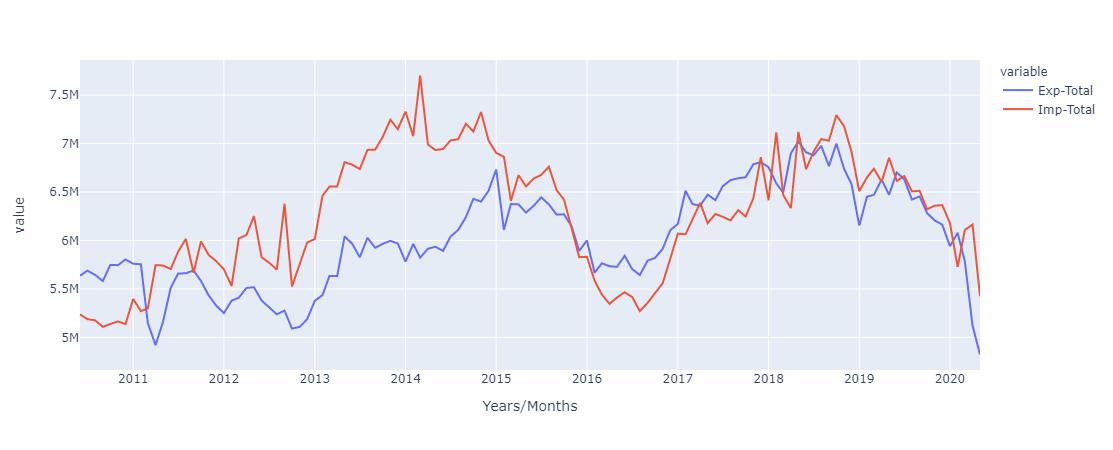

In [32]:
px.line(df, x= 'Years/Months', y = [df.columns[1], df.columns[2]])

In [33]:
df['balance'] = df['Exp-Total'] - df['Imp-Total']

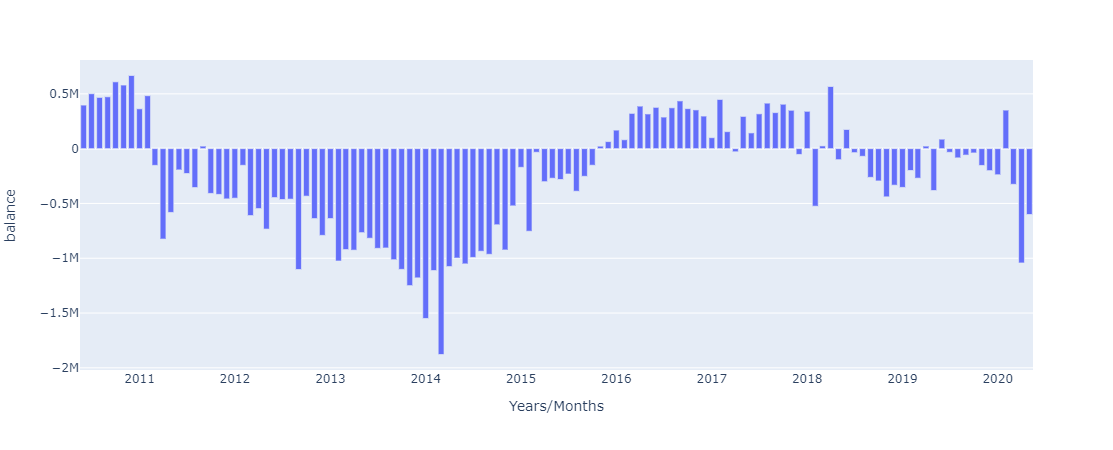

In [34]:
px.bar(df, x = df.columns[0], y='balance')

In [21]:
df.head()

,Years/Months,Exp-Total,Imp-Total,balance
1,2010-04-01,5624812.0,5045774.0,579038.0
2,2010-05-01,5644861.0,5167155.0,477706.0
3,2010-06-01,5656904.0,5242205.0,414699.0
4,2010-07-01,5684947.0,5209667.0,475280.0
5,2010-08-01,5667545.0,5167381.0,500164.0


In [22]:
df['month'] = df['Years/Months'].apply(lambda x: x.month)

In [23]:
df.head()

,Years/Months,Exp-Total,Imp-Total,balance,month
1,2010-04-01,5624812.0,5045774.0,579038.0,4
2,2010-05-01,5644861.0,5167155.0,477706.0,5
3,2010-06-01,5656904.0,5242205.0,414699.0,6
4,2010-07-01,5684947.0,5209667.0,475280.0,7
5,2010-08-01,5667545.0,5167381.0,500164.0,8


In [24]:
df4 = df[df['month'] == 4]
df4.head()

,Years/Months,Exp-Total,Imp-Total,balance,month
1,2010-04-01,5624812.0,5045774.0,579038.0,4
13,2011-04-01,4925515.0,5759160.0,-833645.0,4
25,2012-04-01,5528918.0,6037196.0,-508278.0,4
37,2013-04-01,5666014.0,6608590.0,-942576.0,4
49,2014-04-01,5922058.0,6983331.0,-1061273.0,4


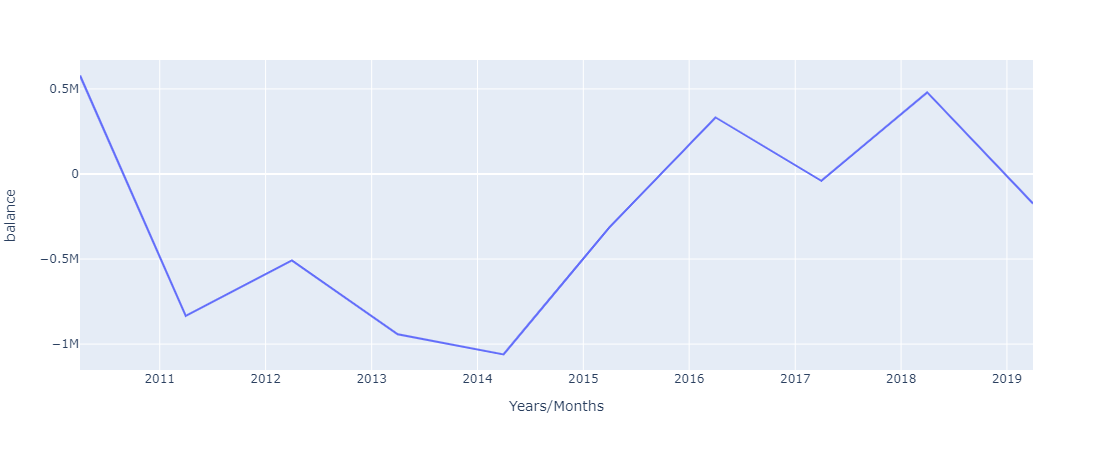

In [25]:
px.line(df4, x = 'Years/Months', y = 'balance')

## Dashアプリに移行

- 貿易収支を月別に観測できるアプリを作成する
- Dropdownで月を選択、複数選択も可能
- コールバックでグラフを返す

In [26]:
app = JupyterDash()

In [27]:
app.layout = html.Div([
    
    html.H1('貿易収支'),
    
    dcc.Dropdown(
        id = 'boueki_dropdown',
        options = [{"label": m, 'value': m} for m in df['month'].unique()],
        value = [4],
        multi=True
    ),
    
    dcc.Graph(
        id = 'boueki_graph_line'
    ),
    dcc.Graph(
        id = 'boueki_graph_bar'
    )
    
    
    
])

@app.callback(
    [Output('boueki_graph_line', 'figure'),
    Output('boueki_graph_bar', 'figure')],
     
     
     [Input('boueki_dropdown', 'value')]
             )
def update_graph(selected_values):
    dff = df[df['month'].isin(selected_values)]
    return px.line(dff, x='Years/Months', y=['Exp-Total', 'Imp-Total']),px.line(dff,x='Years/Months', y='balance')

app.run_server(mode='jupyterlab')